In [1]:
import numpy as np
import pandas as pd

import pdfplumber
import pdfminer
import pdf2image
#fit is the lbi name fo thepyMUPDF suite
import fitz

import layoutparser as lp
from easyocr import Reader

import cv2 as cv2
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract

In [2]:
import easyocr
easyocr.__version__

'1.4.1'

# Functions

In [3]:
#erode the images first
def img_blob_it(img,k=50):
    kernel = np.ones((k,k),np.uint8)
    eroded = cv2.erode(img, kernel, iterations = 1)

    return eroded

def img_dif(file_1, file_2, blob = False,k=50):
    img_1 = cv2.imread(file_1)
    img_2 = cv2.imread(file_2)
    if blob:
       img_1 =  img_blob_it(img_1,k)
       img_2 =  img_blob_it(img_2,k)

    diff = img_1.copy()
    diff = cv2.absdiff(img_1, img_2, diff)

    plt.figure(figsize = (20,15))
    plt.imshow(diff)
    plt.show()
    if blob:
        img_1 = cv2.imread(file_1)
        img_2 = cv2.imread(file_2)
        
    return img_1, img_2, diff



# Grab local files

## Adding the pixels
- Note: there is a difference between array addding and opencv adding
- https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html#:~:text=You%20can%20add%20two%20images,just%20be%20a%20scalar%20value.


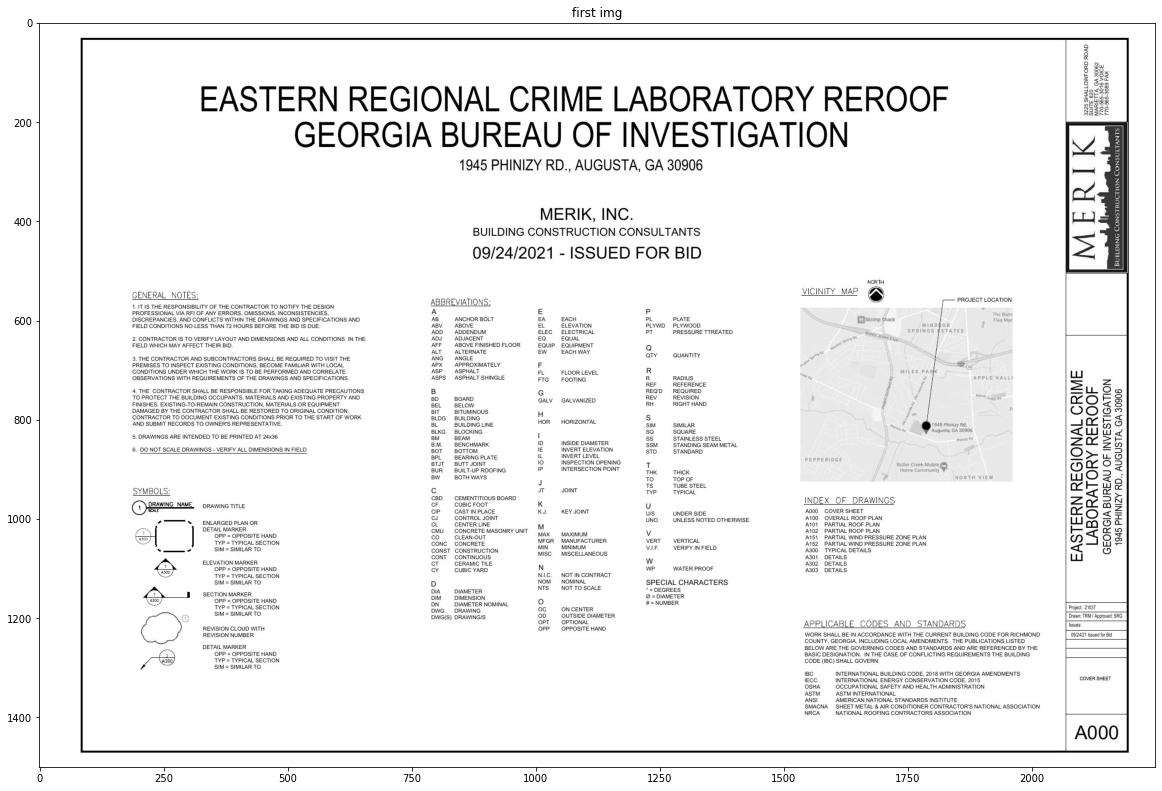

(1500, 2250)


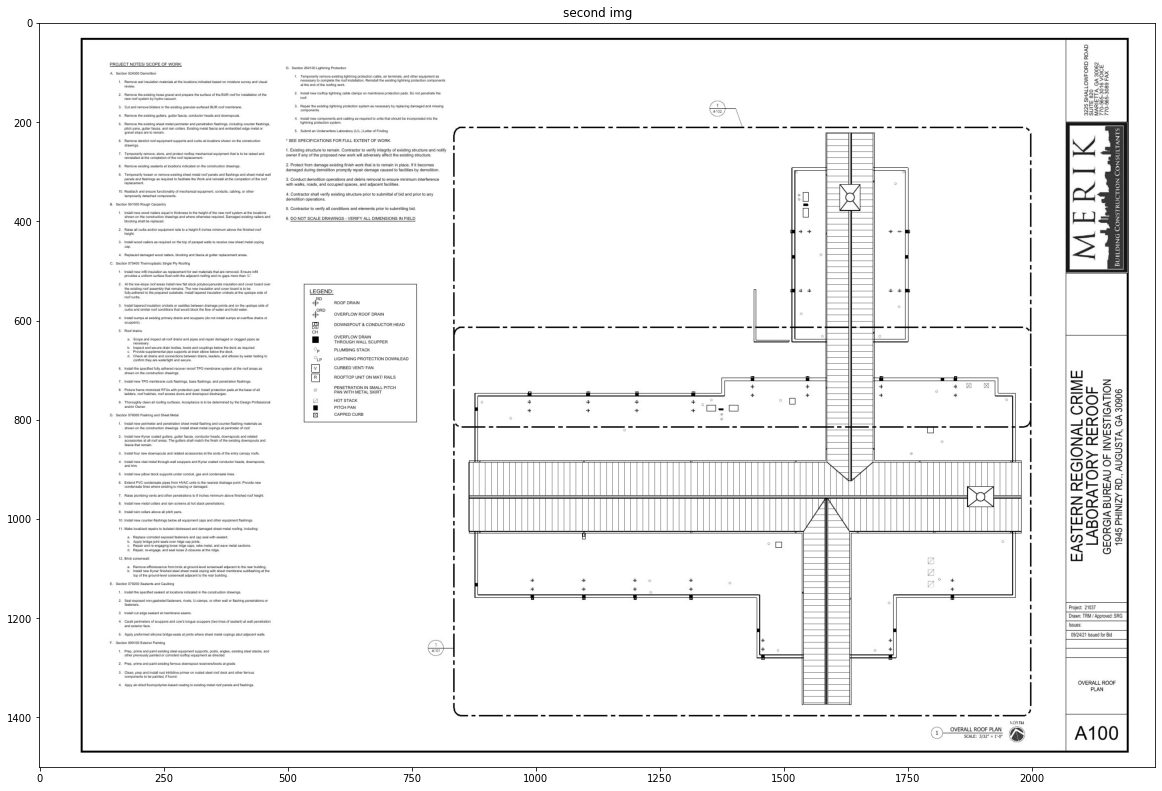

/var/folders/f0/5tbvwh795gn4b30qzsm5g9hr0000gn/T/ipykernel_4286/614404702.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sum = img_1.astype(np.float) + img_2.astype(np.float)



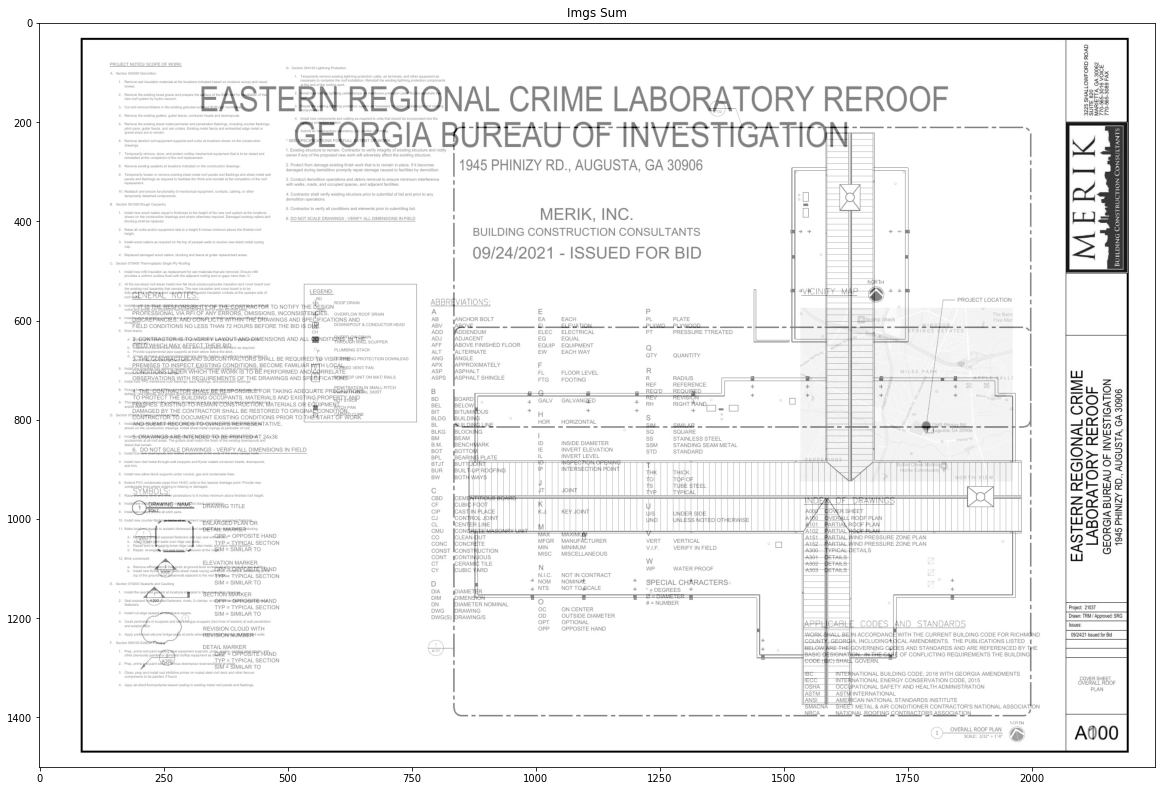

In [4]:
root_path = "./crime_lab_roof/crime_plans_page_"
p = '0'
img_path = root_path+p+".jpeg"
img_1 = cv2.imread(img_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,15))
plt.imshow(img_1, cmap='gray')
plt.title("first img")
plt.show()


p = '1'
img_path = root_path+p+".jpeg"
img_2 = cv2.imread(img_path)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
print(img_2.shape)
plt.figure(figsize = (20,15))
plt.title("second img")
plt.imshow(img_2, cmap='gray')
plt.show()


sum = img_1.astype(np.float) + img_2.astype(np.float)
sum_scaled = np.divide(sum, 255)

plt.figure(figsize = (20,15))
plt.imshow(sum_scaled, cmap='gray')
plt.title("Imgs Sum")
plt.show()

In [ ]:
sum_scaled

## So using the numpy and opencv image fucntions scale/ module again the 256 satuatation for a image pxiel,
## instead I need to treat all as a array until showi time, divide every by 255 before showing. This should help get th intensity relative to frequency of values being added

In [ ]:
#Using numpy/ oepncv Summing operations

img_path = "./crime_lab_roof/crime_plans_page_"+str(0)+".jpeg"
orig = cv2.imread(img_path)
plt.figure(figsize = (20,15))
plt.imshow(orig)
plt.show()

for i in range(8):
    img_path = "./crime_lab_roof/crime_plans_page_"+str(i+1)+".jpeg"
    img_2 = cv2.imread(img_path)
    

    orig = cv2.add(orig, img_2)
    #orig = orig + img_2

    plt.figure(figsize = (20,15))
    plt.imshow(orig)
    plt.show()

In [ ]:
def sum_img_set(root_path,pg_cnt = 8, method = "np"):
    img_path = root_path+str(0)+".jpeg"
    orig = cv2.imread(img_path)
    plt.figure(figsize = (20,15))
    plt.imshow(orig)
    plt.show()
    
    for i in range(pg_cnt):
        img_path = root_path+str(i+1)+".jpeg"
        img_2 = cv2.imread(img_path)
        

        if method == "np":
            #np method is based on modolo 256
            orig = orig + img_2
        else:
            #cv method "satruates" at 255 value for a pixel
            orig = cv2.add(orig, img_2)
        
        plt.figure(figsize = (20,15))
        plt.imshow(orig)
        plt.show()

In [ ]:
root_path = "./crime_lab_roof/crime_plans_page_"
m = "np"

sum_img_set(root_path,pg_cnt = 8, method = m)

In [ ]:
root_path = "./crime_lab_roof/crime_plans_page_"
m = "cv"

sum_img_set(root_path,pg_cnt = 8, method = m)

In [ ]:
root_path = "./crime_lab_roof/kirby_pages/kirby_plans_img_"
m = "np"

sum_img_set(root_path,pg_cnt = 10, method = m)

In [ ]:
#Using numpy/ oepncv Summing operations
#blob the images before adding

root_path = "./crime_lab_roof/crime_plans_page_"
root_path = "./crime_lab_roof/kirby_pages/kirby_plans_img_"

img_path = root_path+str(0)+".jpeg"
orig = cv2.imread(img_path)

plt.figure(figsize = (20,15))
plt.imshow(orig)
plt.show()

orig = img_blob_it(orig, k =10)
for i in range(8):
    img_path = root_path+str(i+1)+".jpeg"
    img_2 = cv2.imread(img_path)
    img_2 = img_blob_it(img_2, k =10)
    

    #orig = cv2.add(orig, img_2)
    orig = orig + img_2

    plt.figure(figsize = (20,15))
    plt.imshow(orig)
    plt.show()

## Numpy SCaling the sum


In [ ]:
#Treat the images as number arrays and then scale them to see the relative intestity of pixels


root_path = "./crime_lab_roof/crime_plans_page_"
#root_path = "./crime_lab_roof/kirby_pages/kirby_plans_img_"

img_path = root_path+str(0)+".jpeg"
orig = cv2.imread(img_path)

sum = cv2.imread(img_path)
sum = cv2.cvtColor(sum, cv2.COLOR_BGR2GRAY)

#plt.figure(figsize = (20,15))
#plt.imshow(orig)
#plt.show()
for i in range(8):
    img_path = root_path+str(i+1)+".jpeg"
    img_2 = cv2.imread(img_path)
    orig = cv2.add(orig, img_2)
   
    plt.figure(figsize = (20,15))
    plt.title("Imgs Sum Img CVOPS")
    plt.imshow(orig)
    plt.show()
    #orig = orig + img_2
    
    
    img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    sum = sum.astype(np.float) + img_2.astype(np.float)
    sum_scaled = np.divide(sum, 255)

    plt.figure(figsize = (20,15))
    plt.imshow(sum_scaled, cmap='gray')
    plt.title("Imgs NP ScaleSum")
    plt.show()

    
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [ ]:

#I want to remove "noise" anything less than a certain treshold
plt.figure(figsize = (20,15))
plt.imshow(sum_scaled, cmap='gray')
plt.title("Imgs Sum")
plt.show()



In [ ]:
sum_scaled.shape

In [ ]:
np.histogram(sum_scaled[3])

In [ ]:
sum_scaled.shape

In [ ]:
#cv2.threshold(dilated, 3, 255, cv2.THRESH_BINARY)
#cleaned = cv2.threshold(sum_scaled,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img = sum_scaled.astype(np.uint8)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cleaned = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
_, cleaned = cv2.threshold(sum_scaled,8,255,cv2.THRESH_TRUNC)

plt.figure(figsize = (20,15))
plt.imshow(cleaned, cmap='gray')
plt.title("Cleaned Imgs Sum")
plt.show()


In [ ]:
cv2.__version__

# Scrap

In [5]:
def plot_pic(img):
    plt.figure(figsize = (20,15))
    plt.imshow(img, cmap = "gray")
    plt.show()

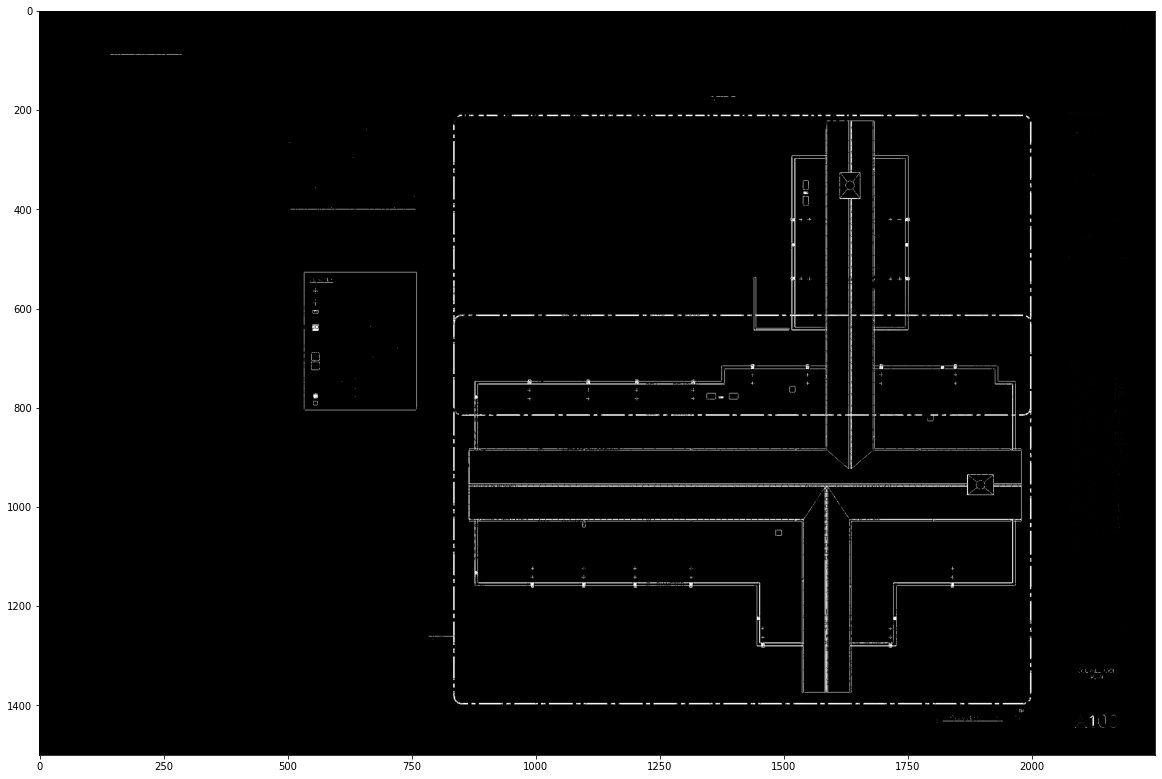

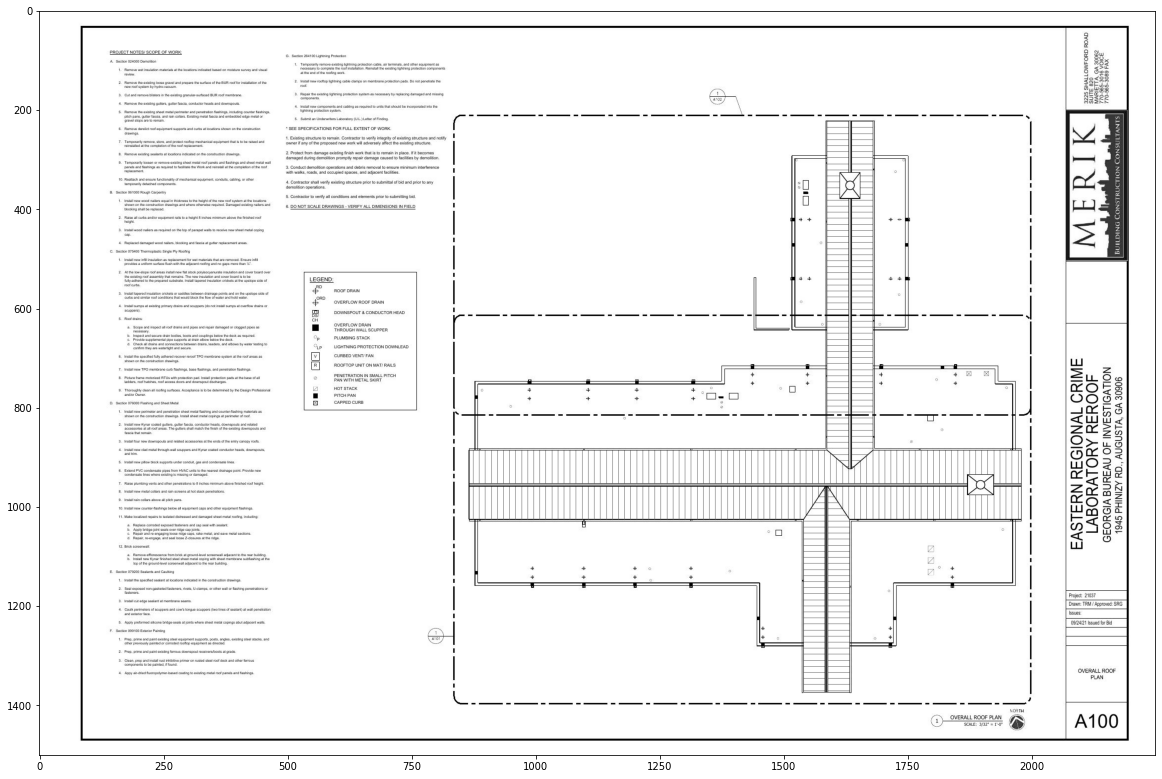

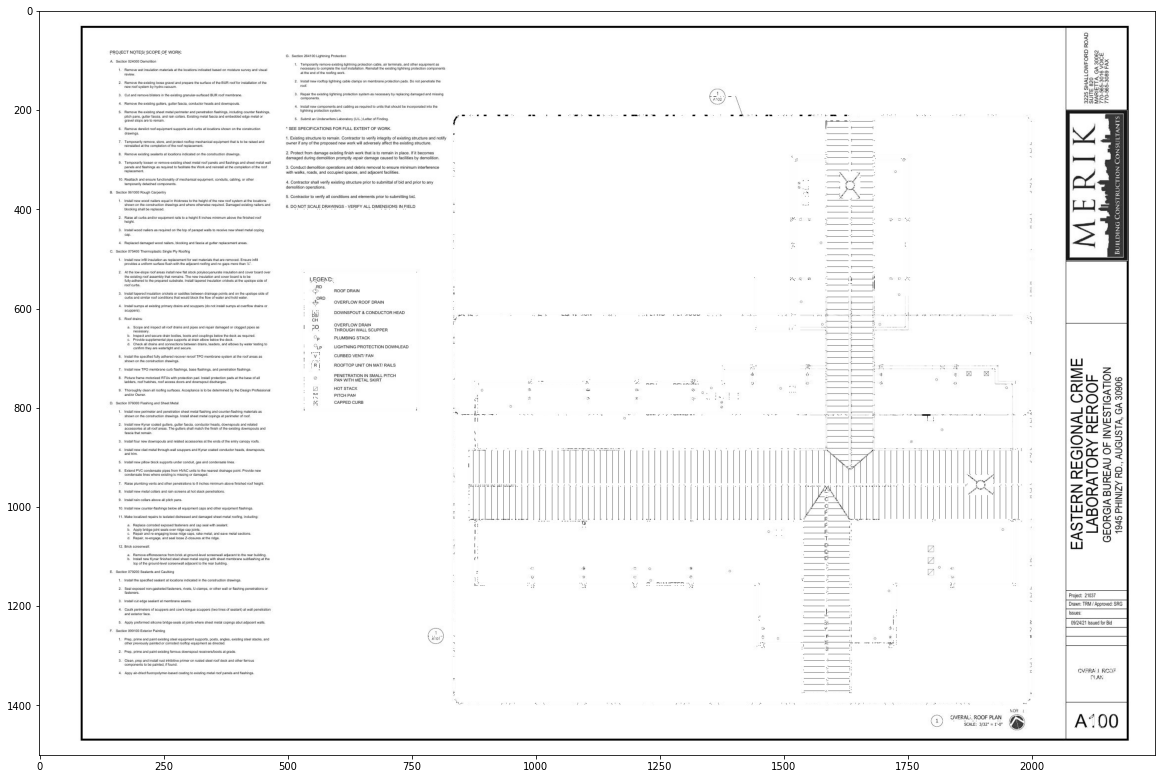

In [6]:
# Load two images
p = '0'
img_path = "./crime_lab_roof/crime_plans_page_"+p+".jpeg"
img_1 = cv2.imread(img_path)
p = '1'
img_path = "./crime_lab_roof/crime_plans_page_"+p+".jpeg"
img_2 = cv2.imread(img_path)

# I want to put logo on top-left corner, So I create a ROI - dont need this in my context
rows,cols,channels = img_2.shape
roi = img_1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plot_pic(img1_bg)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img_2,img_2,mask = mask)
plot_pic(img2_fg)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img_1[0:rows, 0:cols ] = dst

plot_pic(dst)

# Take Image Difference

In [ ]:
#erode the images first
def img_blob_it(img,k=50):
    kernel = np.ones((k,k),np.uint8)
    eroded = cv2.erode(img, kernel, iterations = 1)

    return eroded

def img_dif(file_1, file_2, blob = False,k =50):
    img_1 = cv2.imread(file_1)
    img_2 = cv2.imread(file_2)
    if blob:
       img_1 =  img_blob_it(img_1,k)
       img_2 =  img_blob_it(img_2,k)

    diff = img_1.copy()
    diff = cv2.absdiff(img_1, img_2, diff)

    plt.figure(figsize = (20,15))
    plt.imshow(diff)
    plt.show()
    if blob:
        img_1 = cv2.imread(file_1)
        img_2 = cv2.imread(file_2)
        
    return img_1, img_2, diff



In [ ]:
root_path = "./crime_lab_roof/crime_plans_page_"
root_path = "./crime_lab_roof/kirby_pages/kirby_plans_img_"

In [ ]:
p = '4'
img_path_1 = root_path+p+".jpeg"

p = '5'
img_path_2 = root_path+p+".jpeg"

_, _, diff = img_dif(img_path_1, img_path_2, blob = False)

In [ ]:
p = '4'
img_path_1 = root_path+p+".jpeg"

p = '5'
img_path_2 = root_path+p+".jpeg"

img_1, img_2, diff = img_dif(img_path_1, img_path_2, blob = True, k =15)

where is the ther the biggest difference from the original image and where the image with the overlay removed? box that
#capture the boarder are that has the least amount of pixels currently

In [ ]:
#converting the difference into grascale
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
 
#increasing the size of differences so we can capture them all
for i in range(0, 3):
    dilated = cv2.dilate(gray.copy(), None, iterations= i+1)

plt.figure(figsize = (20,15))
plt.imshow(dilated)
plt.show()

In [ ]:
import imutils

(T, thresh) = cv2.threshold(dilated, 3, 255, cv2.THRESH_BINARY)
 
# now we need to find contours in the binarised image
cnts = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

i = 0
areas  = []
boxes = []
for c in cnts:
    # fit a bounding box to the contour
    (x, y, w, h) = cv2.boundingRect(c)
    bbox = [x, y, w, h]
    #need to capture the rectangle and calcuates that area not the area of the contour
    a = cv2.contourArea(c)
    areas.append(a)
    boxes.append(bbox)
    cv2.rectangle(diff, (x, y), (x + w, y + h), (0, 255, 0), 2)
    i+=1

In [ ]:
plt.figure(figsize = (20,15))
plt.imshow(diff)
plt.show()

In [ ]:
rects = list(zip(cnts,areas,boxes))
type(rects)

In [ ]:
cv2.groupRectangles(boxes, groupThreshold=1, eps = .8)

In [ ]:
rects[0]

In [ ]:
cnt_rects = pd.DataFrame(list(zip(cnts,areas,boxes)), columns = ['cnt_coord', 'areas', 'bbox_tlwh'])
cnt_rects.head()

In [ ]:
cnt_rects.sort_values('areas', ascending=False).head()

In [ ]:
cnt_rects.sort_values('areas', ascending=False).head(1)

In [ ]:
orig = img_1.copy()
x,y,w,h = 352, 181, 1684, 1169

cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), -1)

plt.figure(figsize = (20,15))
plt.imshow(orig)
plt.show()

In [ ]:
orig = img_2.copy()
x,y,w,h = 352, 181, 1684, 1169

cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), -1)

plt.figure(figsize = (20,15))
plt.imshow(orig)
plt.show()